## Import Library

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as np

from tensorflow.keras import datasets

## Load Dataset

In [2]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = datasets.mnist.load_data()

In [3]:
print(y_train_raw)
print(x_train_raw.shape)
print(x_test_raw.shape)

[5 0 4 ... 5 6 8]
(60000, 28, 28)
(10000, 28, 28)


## Label Encoding

In [4]:
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train_raw, num_classes)
y_test = tf.keras.utils.to_categorical(y_test_raw, num_classes)

print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Preview Isi Dataset

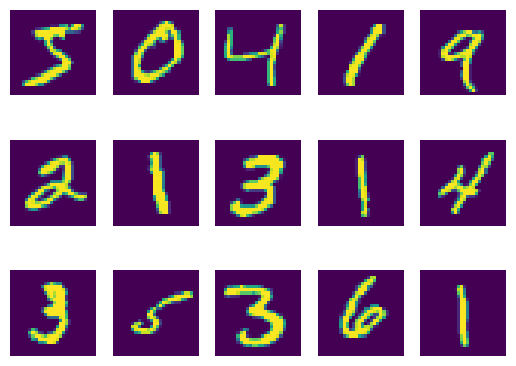

In [5]:
plt.figure()
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(x_train_raw[i])
    plt.axis('off')
plt.show()

## Konversi Gambar

In [6]:
x_train = x_train_raw.reshape(60000, 784)
x_test = x_test_raw.reshape(10000, 784)

## Normalisasi

In [7]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

## Buat Model (Sequential)

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_dim=784),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


## Model Compile

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Training Model

In [11]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=[x_test, y_test])

Epoch 1/10
469/469 [==============================] - 9s 20ms/step - loss: 2.7619e-08 - accuracy: 1.0000 - val_loss: 0.1380 - val_accuracy: 0.9860
Epoch 2/10
469/469 [==============================] - 9s 20ms/step - loss: 2.1531e-08 - accuracy: 1.0000 - val_loss: 0.1401 - val_accuracy: 0.9860
Epoch 3/10
469/469 [==============================] - 9s 20ms/step - loss: 1.6844e-08 - accuracy: 1.0000 - val_loss: 0.1424 - val_accuracy: 0.9861
Epoch 4/10
469/469 [==============================] - 10s 20ms/step - loss: 1.3371e-08 - accuracy: 1.0000 - val_loss: 0.1445 - val_accuracy: 0.9864
Epoch 5/10
469/469 [==============================] - 9s 20ms/step - loss: 1.0570e-08 - accuracy: 1.0000 - val_loss: 0.1463 - val_accuracy: 0.9863
Epoch 6/10
469/469 [==============================] - 9s 20ms/step - loss: 8.5751e-09 - accuracy: 1.0000 - val_loss: 0.1480 - val_accuracy: 0.9863
Epoch 7/10
469/469 [==============================] - 9s 20ms/step - loss: 6.9042e-09 - accuracy: 1.0000 - val_loss: 

## Evaluasi Model

In [12]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.1544 - accuracy: 0.9862


[0.15441134572029114, 0.9861999750137329]

## Save Model

In [13]:
model.save('model/model.h5')

## Load Model

In [14]:
model_saved = tf.keras.models.load_model('model/model.h5')
model_saved.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [15]:
model_saved.evaluate(x_test, y_test, batch_size=32)

313/313 [==============================] - 2s 4ms/step - loss: 0.1544 - accuracy: 0.9862


[0.15441134572029114, 0.9861999750137329]